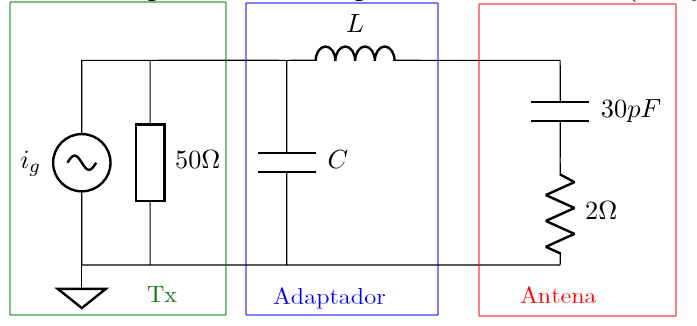

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (12, 8),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 


plt.rcParams.update(params)
from IPython.display import Image

Image(filename= "fig/eje2.png",width=450)

El circuito corresponde a una antena conectada a un equipo transmisor de $100W$.
Se desea que el equipo transmisor, la fuente de corriente, tenga una carga de $Z_{in} = 50\Omega+j0\Omega$ @ $2 MHz$. 

La antena presenta una impedancia de $Z_{ant} = (2 - j wo \cdot 30pF) \Omega$ @ $2 MHz$


Para que esté adaptada, se recurre así al circuito de adaptación mostrado en la figura compuesto por L y C. Suponga que la resistencia de perdida de L es $r_s = 1\Omega$ y y el capacitor tiene $ESR= 0.2\Omega$. . 



    1.  $Q_c$, L y C  para máxima transferencia de energía a Qcte a $F_o = 2MHz$.(10ptos)
    2.  Verifique usando la carta de Smith.(10ptos)
    3.  Potencia disipada por el adaptador, potencia sobre la carga  y verifique empleando simuladores. (10ptos)



In [6]:
# Datos
RL = 2
CL = 30e-12
rpls = 1
ESR  = 0.2
rpcs = ESR
zg = 50.

Pdisp  = 100 # W RMS

 
fo  =  2e6
wo = 2*np.pi*fo


# Calculo la impedancia de la fuente para el modelo paralelo
rg = zg.real 



Ptot   = 2 * Pdisp
ig     = (Ptot* 2 / (rg/2) )**(1/2) # 
print('rg =  {:1.1f} ohms'.format(rg) )
print('ig =  {:2.2f} Ap'.format(ig) )



rg =  50.0 ohms
ig =  4.00 Ap


In [7]:
# L = L1 + L2

# La reactancia del capacitor de la antena:
Xcl = -1/(wo*CL)

# Parte de la bobina que cancela la reactancia del capacitor de la antena:
Xl1  = -Xcl
L1  = Xl1/wo
# Ahora el circuito resultante es L2 serie RL, que esta en paralelo con C
# Buscamos que RLp sea igual a rg
RLs  = RL
RLp  = rg

# Calculamos el Qm 
# RLp = RLs * (1 + Qm**2)
Qm = ((RLp/RLs)-1)**(1/2)

# Circuito LR serie
# Qm = (wo*L2)/RLs
L2 = Qm*RLs/wo

L2p = L2 *(1+ (1/Qm)**2)

L = L1 + L2
QoL  = (wo*L)/(rpls)


# C sintoniza a Lp
Cp = 1/(wo**2 * L2p)
# Suponiendo QoC > 10 
Cs = Cp # hay que verificar!
QoC  = 1/(rpcs*wo*Cs)
if QoC > 10: C = Cp 


print('Qm =  {:1.1f} '.format(Qm) )
print('C  =  {:1.3e} F'.format(Cp) )
print('QoC =  {:1.1e} '.format(QoC) )
print('L  =  {:1.4e} Hy'.format(L) )
print('QoL =  {:1.1f} '.format(QoL) )
      

Qm =  4.9 
C  =  7.797e-09 F
QoC =  5.1e+01 
L  =  2.1187e-04 Hy
QoL =  2662.4 


In [8]:
import myplot as myp

In [9]:
# Ahora calculando en la hoja de calculo 
# Defino el array de frecuencia
f =  np.arange(1.99e6,2.01e6,1)
# armo el array de w
w = 2*np.pi*f

# Ahora comparamos con el circuito usando el capacitor sin perdidas
## DATOS
print('Los datos empleados para los calculos:')
print('.param rant  =  {:1.1f} '.format(RL) )
print('.param cant  =  {:1.1e} '.format(CL) )

print('.param C =  {:1.3e} '.format(C) )
print('.param rpcs  =  {:1.3f} '.format(rpcs) )

print('.param L  =  {:1.4e} '.format(L) )
print('.param rpls  = {:1.3f} '.format(rpls) )

print('.param rg  =  {:1.2f} '.format(rg) )
print('.param ig  =  {:1.2f} '.format(ig) )
print('')

# Impedancia de carga 
Xcl  = -1/(w*CL)
ZL   = RL + 1j*Xcl

# inductor serie con perdidas
Xls   = w*L
Zls   = rpls + 1j*Xls


# Impedancia total incluida la impedancia del generador
Zs   =  Zls + ZL

# Impedancia de capacitor C 
Xcl  = -1/(w*C)
Zc   = rpcs + 1j*Xcl
Qoc  = 1/(rpcs*w*C)

# impedancia de entrada
Zin = Zc * Zs / (Zc + Zs)



Los datos empleados para los calculos:
.param rant  =  2.0 
.param cant  =  3.0e-11 
.param C =  7.797e-09 
.param rpcs  =  0.200 
.param L  =  2.1187e-04 
.param rpls  = 1.000 
.param rg  =  50.00 
.param ig  =  4.00 



/home/aalmela/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/aalmela/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Potencia a la entrada del adaptador 95.92 W, a la frecuencia 2.00e+06 Hz.
Potencia disipada en el adaptador 36.65 W, a la frecuencia 2.00e+06 Hz.
frecuencia central
fo =  2.000e+06 MHz
Ancho de banda:
Qc  =  5.144e+02 
BW  =  0.004 MHz

Potenicia:
PRL  =  5.929e+01 W (eff)
PRL  =  4.77e+01 dBm (eff)


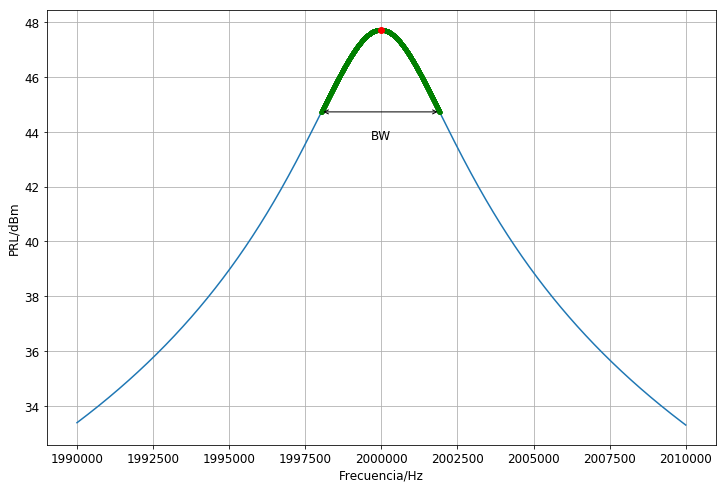

In [27]:
# incluyendo la impedancia de la fuente
Z = rg * Zin / (rg + Zin )

# Calculo de la potenicia de RL
# tension de entrada
v   = ig * Z

# Divisor resistivo de la entrada:
iin = v /Zin

# Potencia a la entrada del adaptador 
Pin = (v*iin).real/2
# fo 
no = len(f)/2
print('Potencia a la entrada del adaptador {:1.2f} W, a la frecuencia {:1.2e} Hz.'.format(Pin[no],f[no]))


#print('Pin = {:1.2f}'.format(Pin))
irl = v / Zs
vrl = irl*RL
Prl = np.abs(irl*vrl)/2 # potenica eficaz
Padap = Pin - Prl
print('Potencia disipada en el adaptador {:1.2f} W, a la frecuencia {:1.2e} Hz.'.format(Padap[no],f[no]))


myp.imprimePRL(f, Prl)


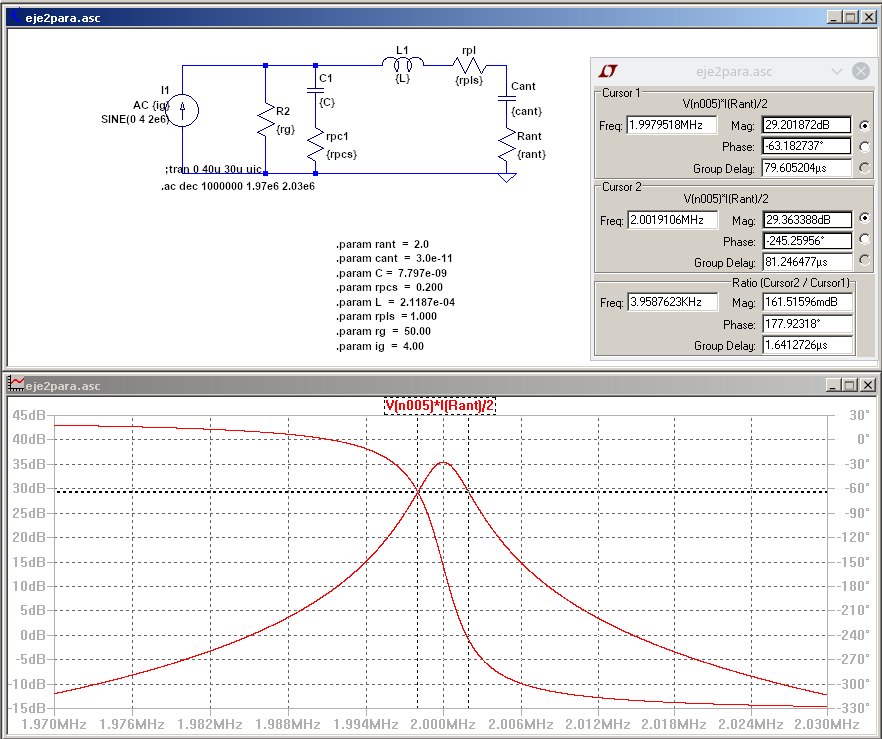

In [11]:
Image(filename= "fig/eje2sim.png",width=950)

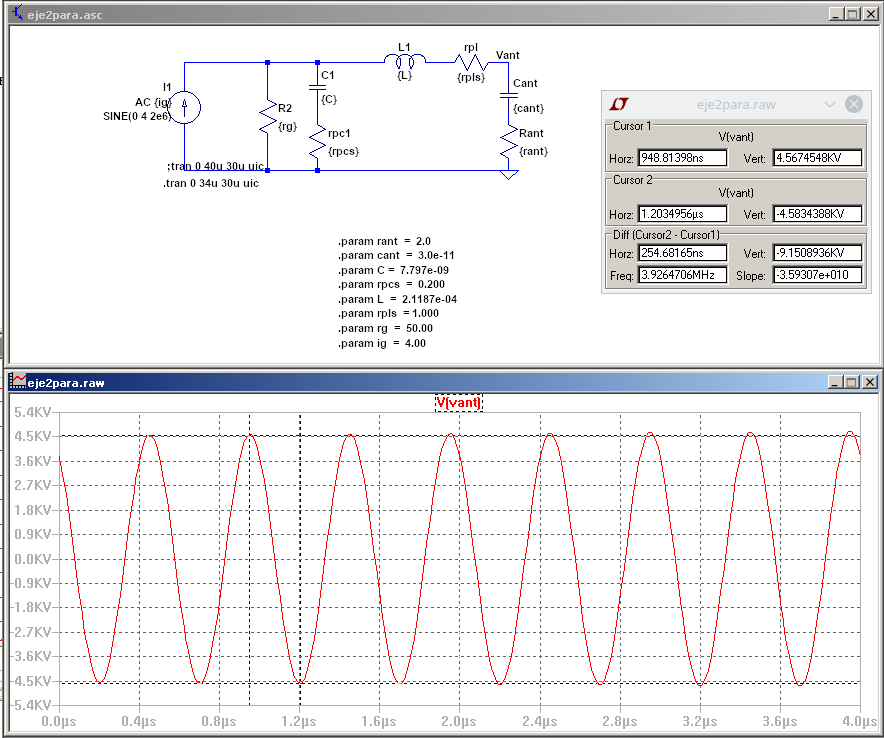

In [8]:
Image(filename= "fig/eje2sim1.png",width=950)